# **사업 분야 확장을 위한 고객 기반 카테고리 분석**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')


Mounted at /content/gdrive/


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#**데이터 전처리**

##카테고리 이름 영어로 변경
(제품 카테고리명이 포르투갈어로 되어 있음, 영어로 번역된 데이터셋으로 대체)

In [ ]:
products = products.merge(category, left_on='product_category_name',right_on='product_category_name', how='left')

In [ ]:
products = products.drop(['product_category_name'], axis=1)

##병합
1.주문 테이블 + 주문 상품 테이블

In [ ]:
order_products_merged=order_items.merge(products, on='product_id',how='left')

In [ ]:
order_products_merged

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,42.0,480.0,1.0,200.0,16.0,10.0,15.0,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,housewares
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,31.0,232.0,1.0,8950.0,45.0,26.0,38.0,computers_accessories
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,43.0,869.0,1.0,967.0,21.0,24.0,19.0,sports_leisure
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,56.0,1306.0,1.0,100.0,20.0,20.0,20.0,computers_accessories


##필요한 컬럼만 남기기
(가설 검증에 불필요한 상품의 무게,배송 날짜 등의 컬럼 삭제)

In [ ]:
# 필요한 컬럼 선택
selected_columns = [
    'order_id',
    'customer_unique_id',
    'customer_zip_code_prefix',
    'customer_city',
    'customer_state',
    'order_item_id',
    'product_id',
    'product_category_name_english'
]

# 새로운 데이터프레임 생성
customers_orders_new= customers_orders[selected_columns]


In [ ]:
customers_orders_new

,order_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,product_category_name_english
0,00e7ee1b050b8499577073aeb2a297a1,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,1.0,a9516a079e37a9c9c36b9b78b10169e8,office_furniture
1,29150127e6685892b6eab3eec79f59c7,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,1.0,4aa6014eceb682077f9dc4bffebc05b0,housewares
2,b2059ed67ce144a36e2aa97d2c9e9ad2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,1.0,bd07b66896d6f1494f5b86251848ced7,office_furniture
3,951670f92359f4fe4a63112aa7306eba,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,1.0,a5647c44af977b148e0a3a4751a09e2e,office_furniture
4,6b7d50bd145f6fc7f33cebabd7e49d0f,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,1.0,9391a573abe00141c56e38d84d7d5b3b,home_confort
...,...,...,...,...,...,...,...,...
113420,6760e20addcf0121e9d58f2f1ff14298,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,1.0,ccb4503d9d43d245d3b295d0544f988b,books_general_interest
113421,9ec0c8947d973db4f4e8dcf1fbfa8f1b,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,1.0,9ede6b0570a75a4b9de4f383329f99ee,sports_leisure
113422,fed4434add09a6f332ea398efd656a5c,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,1.0,7a5d2e1e131a860ae7d18f6fffa9d689,health_beauty
113423,e31ec91cea1ecf97797787471f98a8c2,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,1.0,f819f0c84a64f02d3a5606ca95edd272,watches_gifts


In [ ]:
# 결측치의 총 갯수 확인하기
customers_orders_new.isna().sum()

,0
order_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0
order_item_id,775
product_id,775
product_category_name_english,2402


결측치 날리기
*  order_item, product_id가 널값인것이 category널값이기도함

*   따라서 결측치 모두 drop





# **STEP01**

state의 수가 27개로 너무 많아서,  

*   북부 (North)	AC,AM, AP, PA, RO, RR, TO
*   북동부 (Northeast)	AL, BA, CE, MA, PB, PE, PI, RN, SE
*   중서부 (Central-West)	DF, GO, MT, MS
*   남동부 (Southeast)	ES, MG, RJ, SP
*   남부 (South)	PR, RS, SC

지역별로 추려서 5개의 그룹으로 그룹할 예정






In [ ]:
# 주(State)별 지역 그룹화
region_mapping = {
    "North": ["AC", "AM", "AP", "PA", "RO", "RR", "TO"],
    "Northeast": ["AL", "BA", "CE", "MA", "PB", "PE", "PI", "RN", "SE"],
    "Central-West": ["DF", "GO", "MT", "MS"],
    "Southeast": ["ES", "MG", "RJ", "SP"],
    "South": ["PR", "RS", "SC"]
}

# 데이터프레임에 지역 추가
customers_orders_new["region"] = customers_orders_new["customer_state"].map(lambda x: next((k for k, v in region_mapping.items() if x in v), "Unknown"))

# 1. 지역(Region)별 인기 제품 분석
region_popular_products = customers_orders_new.groupby(['region', 'product_category_name_english']).size().reset_index(name='purchase_count')

# 각 지역에서 가장 많이 판매된 제품 카테고리 찾기
top_products_per_region = region_popular_products.sort_values(['region', 'purchase_count'], ascending=[True, False]).groupby('region').head(5).reset_index()

# 2. 특정 지역 고객의 구매 패턴 분석
# 고객이 구매한 제품과 지역별 인기 제품 매칭
customer_purchases = customers_orders_new.merge(top_products_per_region, on='region', suffixes=('_customer', '_region'))




<ipython-input-25-a202e2482f22>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers_orders_new["region"] = customers_orders_new["customer_state"].map(lambda x: next((k for k, v in region_mapping.items() if x in v), "Unknown"))


In [ ]:
top_products_per_region
#각 지역에서 가장 많이 판매된 카테고리

,index,region,product_category_name_english,purchase_count
0,39,Central-West,health_beauty,630
1,7,Central-West,bed_bath_table,578
2,61,Central-West,sports_leisure,542
3,35,Central-West,furniture_decor,420
4,13,Central-West,computers_accessories,405
5,102,North,health_beauty,212
6,80,North,computers_accessories,174
7,121,North,sports_leisure,166
8,124,North,telephony,145
9,126,North,watches_gifts,145


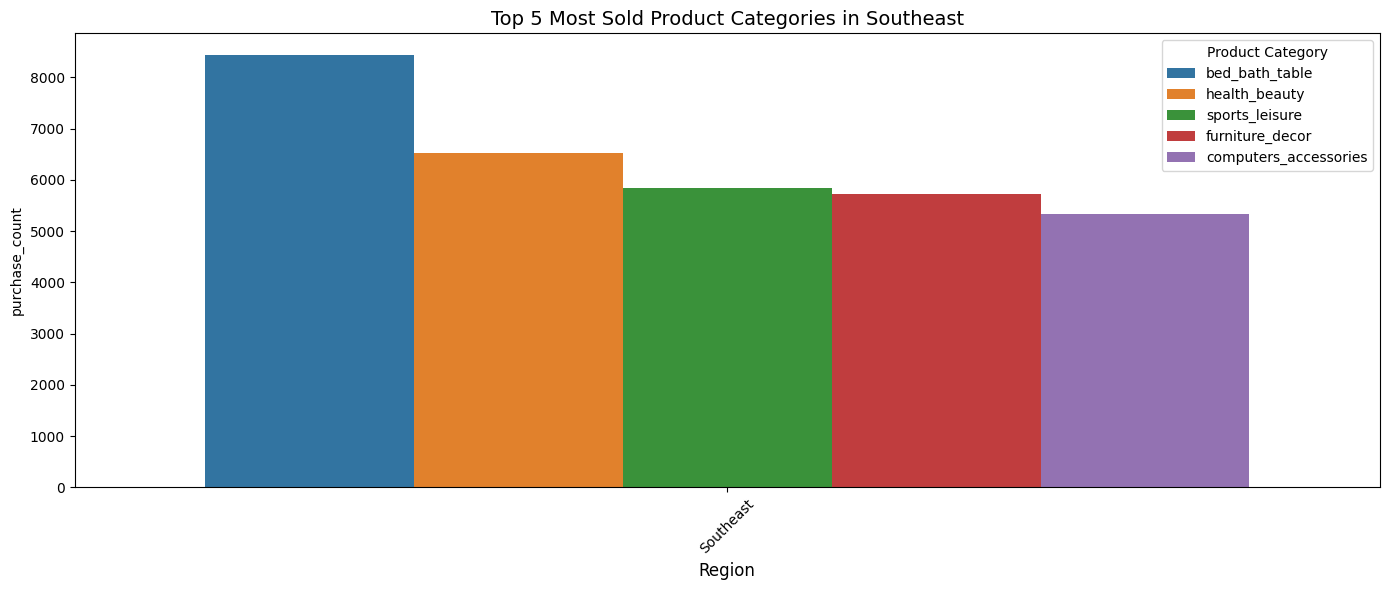

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# "Southeast"가 포함된 모든 지역 데이터 필터링
southeast_data = top_products_per_region[top_products_per_region['region'].str.contains("Southeast")]

# 그래프 크기 설정
fig, ax = plt.subplots(figsize=(14, 6))  # 단일 플롯이므로 axes가 아닌 ax 사용

# Southeast 지역 그래프
sns.barplot(
    data=southeast_data,
    x='region',
    y='purchase_count',
    hue='product_category_name_english',
    dodge=True,
    ax=ax  # 단일 플롯이므로 ax 사용
)

# 그래프 제목 및 라벨
ax.set_title("Top 5 Most Sold Product Categories in Southeast", fontsize=14)
ax.set_xlabel("Region", fontsize=12)
ax.tick_params(axis='x', rotation=45)
ax.legend(title="Product Category")

# 레이아웃 조정 및 출력
plt.tight_layout()
plt.show()



In [ ]:
customers_orders_new.isna().sum()

,0
order_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0
order_item_id,0
product_id,0
product_category_name_english,0


In [ ]:
customers_orders_new=customers_orders_new.dropna()

결측치 날리기
*  order_item, product_id가 널값인것이 category널값이기도함

*   따라서 결측치 모두 drop





In [ ]:
# 결측치의 총 갯수 확인하기
customers_orders_new.isna().sum()

,0
order_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0
order_item_id,775
product_id,775
product_category_name_english,2402


In [ ]:
customers_orders_new

,order_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,product_category_name_english
0,00e7ee1b050b8499577073aeb2a297a1,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,1.0,a9516a079e37a9c9c36b9b78b10169e8,office_furniture
1,29150127e6685892b6eab3eec79f59c7,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,1.0,4aa6014eceb682077f9dc4bffebc05b0,housewares
2,b2059ed67ce144a36e2aa97d2c9e9ad2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,1.0,bd07b66896d6f1494f5b86251848ced7,office_furniture
3,951670f92359f4fe4a63112aa7306eba,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,1.0,a5647c44af977b148e0a3a4751a09e2e,office_furniture
4,6b7d50bd145f6fc7f33cebabd7e49d0f,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,1.0,9391a573abe00141c56e38d84d7d5b3b,home_confort
...,...,...,...,...,...,...,...,...
113420,6760e20addcf0121e9d58f2f1ff14298,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,1.0,ccb4503d9d43d245d3b295d0544f988b,books_general_interest
113421,9ec0c8947d973db4f4e8dcf1fbfa8f1b,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,1.0,9ede6b0570a75a4b9de4f383329f99ee,sports_leisure
113422,fed4434add09a6f332ea398efd656a5c,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,1.0,7a5d2e1e131a860ae7d18f6fffa9d689,health_beauty
113423,e31ec91cea1ecf97797787471f98a8c2,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,1.0,f819f0c84a64f02d3a5606ca95edd272,watches_gifts


In [ ]:
# 필요한 컬럼 선택
selected_columns = [
    'order_id',
    'customer_unique_id',
    'customer_zip_code_prefix',
    'customer_city',
    'customer_state',
    'order_item_id',
    'product_id',
    'product_category_name_english'
]

# 새로운 데이터프레임 생성
customers_orders_new= customers_orders[selected_columns]


In [ ]:
customers_orders

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,124.99,21.88,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,289.00,46.48,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,housewares
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,139.94,17.79,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,office_furniture
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,149.94,23.36,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,office_furniture
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,230.00,22.25,61.0,407.0,1.0,5200.0,45.0,15.0,35.0,home_confort
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113420,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,...,74.90,13.88,51.0,489.0,2.0,611.0,22.0,22.0,23.0,books_general_interest
113421,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,...,114.90,14.16,51.0,1193.0,1.0,1211.0,25.0,24.0,22.0,sports_leisure
113422,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,...,37.00,19.04,60.0,575.0,1.0,870.0,25.0,20.0,18.0,health_beauty
113423,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,...,689.00,22.07,59.0,452.0,1.0,710.0,19.0,13.0,14.0,watches_gifts


In [ ]:
customers_orders=customers.merge(order_products_merged,on='order_id',how='left')

3. 1과2를 병합

(고객별 주문 내역과 주문 상품이 포함된 테이블 생성)



In [ ]:
customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25 00:00:00
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20 00:00:00
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02 00:00:00
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05 00:00:00


In [ ]:
customers=customers.merge(orders,on='customer_id',how='left')

2.주문 테이블 + 고객 테이블

# **STEP02**

## 동일한 테이블 사용하므로 병합 과정 생략

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Brazilian E-Commerce Public Dataset/eng_ver.csv')

#원본 백업
df_origin = df.copy()

In [ ]:
#전체 컬럼 보기 설정
pd.set_option('display.max_columns', None)
#필수 컬럼만 남김
df = df[['order_id', 'customer_unique_id', 'product_id', 'order_item_id', 'product_category_name_english']]
#컬럼명 변경
df['product_category_name'] = df['product_category_name_english']

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113425 entries, 0 to 113424
Data columns (total 6 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       113425 non-null  object 
 1   customer_unique_id             113425 non-null  object 
 2   product_id                     112650 non-null  object 
 3   order_item_id                  112650 non-null  float64
 4   product_category_name_english  111023 non-null  object 
 5   product_category_name          111023 non-null  object 
dtypes: float64(1), object(5)
memory usage: 5.2+ MB


## 결측치

In [ ]:
df.isna().sum()

,0
order_id,0
customer_unique_id,0
product_id,775
order_item_id,775
product_category_name_english,2402
product_category_name,2402


In [ ]:
df.isna().mean()

,0
order_id,0.000000
customer_unique_id,0.000000
product_id,0.006833
order_item_id,0.006833
product_category_name_english,0.021177
product_category_name,0.021177


In [ ]:
df[df['product_category_name'].isna()]

,order_id,customer_unique_id,product_id,order_item_id,product_category_name_english,product_category_name
7,1093c8304c7a003280dd34598194913d,57b2a98a409812fe9618067b6b8ebe4f,124f74f703e88efe001a10bfa718b6ff,1.0,NaN,NaN
50,6e98de3a85c84ead6689189b825d35b5,233896de79986082f1f479f1f85281cb,NaN,NaN,NaN,NaN
90,cc07a8fdd3a8e94d683c8142a117dbc1,e5dbefdfdf3eff75c8e6cd655f128279,5a848e4ab52fd5445cdc07aab1c40e48,1.0,NaN,NaN
174,f51e3c7f79d1e2c076acbb6af1588b95,755bdc2822a8f01cfcec19ae4dcaae66,e1da02256dce4dee2207c36853547c7b,1.0,NaN,NaN
330,df8c077268f7f3baaac0892eb3143642,0071f46a072a9ae25bbe4438b15efe9c,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
113045,9b932dca249f9971b86dde2f2d7ad412,639b4096a4e5c96549a9bb495ca4871e,NaN,NaN,NaN,NaN
113091,d08257023bba46fdf7e3cfcccac606b8,74ec77145a467b1a96152aac1c3ab137,cf951c39ef0ca44ee11278e4ece167d1,1.0,NaN,NaN
113092,d08257023bba46fdf7e3cfcccac606b8,74ec77145a467b1a96152aac1c3ab137,cf951c39ef0ca44ee11278e4ece167d1,2.0,NaN,NaN
113184,a1fa82769a203e30b8faf81cd32e5193,6d443b75cff956bb73dce7385033e266,24aba57735be13fd785bc04d1a8812e4,2.0,NaN,NaN


임의로 채우면 오히려 노이즈가 발생할 확률이 높다고 판단, 제거해도 치명적인 데이터 양이 아니라 drop 결정

In [ ]:
product_category_name_nan = df[df['product_category_name'].isna()].index
product_id_nan = df[df['product_id'].isna()].index
order_item_id_nan = df[df['order_item_id'].isna()].index

In [ ]:
len(df)

113425

In [ ]:
df.dropna()

,order_id,customer_unique_id,product_id,order_item_id,product_category_name_english,product_category_name
0,00e7ee1b050b8499577073aeb2a297a1,861eff4711a542e4b93843c6dd7febb0,a9516a079e37a9c9c36b9b78b10169e8,1.0,office_furniture,office_furniture
1,29150127e6685892b6eab3eec79f59c7,290c77bc529b7ac935b93aa66c333dc3,4aa6014eceb682077f9dc4bffebc05b0,1.0,housewares,housewares
2,b2059ed67ce144a36e2aa97d2c9e9ad2,060e732b5b29e8181a18229c7b0b2b5e,bd07b66896d6f1494f5b86251848ced7,1.0,office_furniture,office_furniture
3,951670f92359f4fe4a63112aa7306eba,259dac757896d24d7702b9acbbff3f3c,a5647c44af977b148e0a3a4751a09e2e,1.0,office_furniture,office_furniture
4,6b7d50bd145f6fc7f33cebabd7e49d0f,345ecd01c38d18a9036ed96c73b8d066,9391a573abe00141c56e38d84d7d5b3b,1.0,home_confort,home_confort
...,...,...,...,...,...,...
113420,6760e20addcf0121e9d58f2f1ff14298,1a29b476fee25c95fbafc67c5ac95cf8,ccb4503d9d43d245d3b295d0544f988b,1.0,books_general_interest,books_general_interest
113421,9ec0c8947d973db4f4e8dcf1fbfa8f1b,d52a67c98be1cf6a5c84435bd38d095d,9ede6b0570a75a4b9de4f383329f99ee,1.0,sports_leisure,sports_leisure
113422,fed4434add09a6f332ea398efd656a5c,e9f50caf99f032f0bf3c55141f019d99,7a5d2e1e131a860ae7d18f6fffa9d689,1.0,health_beauty,health_beauty
113423,e31ec91cea1ecf97797787471f98a8c2,73c2643a0a458b49f58cea58833b192e,f819f0c84a64f02d3a5606ca95edd272,1.0,watches_gifts,watches_gifts


## 재구매율 구하기
→ 전체 고객 중, 특정 카테고리를 한 번 이상 반복 구매한 고객의 비율

In [ ]:
#고객별로 구매한 카테고리 개수 계산
customer_category_counts = df.groupby(['customer_unique_id', 'product_category_name']).size().reset_index(name='purchase_count')
customer_category_counts

,customer_unique_id,product_category_name,purchase_count
0,0000366f3b9a7992bf8c76cfdf3221e2,bed_bath_table,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,health_beauty,1
2,0000f46a3911fa3c0805444483337064,stationery,1
3,0000f6ccb0745a6a4b88665a16c9f078,telephony,1
4,0004aac84e0df4da2b147fca70cf8255,telephony,1
...,...,...,...
96443,fffcf5a5ff07b0908bd4e2dbc735a684,health_beauty,2
96444,fffea47cd6d3cc0a88bd621562a9d061,baby,1
96445,ffff371b4d645b6ecea244b27531430a,auto,1
96446,ffff5962728ec6157033ef9805bacc48,watches_gifts,1


In [ ]:
#구매 횟수가 2회 이상인 경우
repeat_purchases = customer_category_counts[customer_category_counts['purchase_count'] > 1]
repeat_purchases

,customer_unique_id,product_category_name,purchase_count
7,00053a61a98854899e70ed204dd4bafe,sports_leisure,2
18,000de6019bb59f34c099a907c151d855,bed_bath_table,2
22,000fbf0473c10fc1ab6f8d2d286ce20c,musical_instruments,2
23,000fbf0473c10fc1ab6f8d2d286ce20c,toys,2
26,001147e649a7b1afd577e873841632dd,housewares,2
...,...,...,...
96416,ffe96201d466b0e0dc8139850be29d5d,construction_tools_lights,2
96432,fff22793223fe80c97a8fd02ac5c6295,perfumery,3
96436,fff5eb4918b2bf4b2da476788d42051c,signaling_and_security,6
96438,fff7219c86179ca6441b8f37823ba3d3,bed_bath_table,2


In [ ]:
#재구매 고객 수
repeat_customer_count = repeat_purchases['customer_unique_id'].nunique()
repeat_customer_count

10037

In [ ]:
#전체 고객 수
total_customers = df['customer_unique_id'].nunique()
total_customers

96096

In [ ]:
#재구매율
repeat_purchase_rate = repeat_customer_count / total_customers
print(repeat_purchase_rate)
round(repeat_purchase_rate*100,2)

0.1044476356976357


10.44

## 카테고리별 재구매율 확인
### 목적
어떤 제품군이 재구매가 활발한지 분석하여 **전략 수립** 가능
### 방법
각 product_category_name별로 고객이 동일한 카테고리를 다시 구매한 비율을 계산

In [ ]:
# 각 카테고리별 고객의 구매 횟수 계산
category_repeat_counts = df.groupby(['product_category_name', 'customer_unique_id']).size().reset_index(name='purchase_count')

# 각 카테고리에서 재구매한 고객 수 계산
category_repurchase = category_repeat_counts[category_repeat_counts['purchase_count'] > 1]
category_repurchase_rate = (
    category_repurchase.groupby('product_category_name')['customer_unique_id'].nunique()
    / category_repeat_counts.groupby('product_category_name')['customer_unique_id'].nunique()
) * 100

# 특정 카테고리만 필터링(bed_bath_table을 제외한 Step01의 TOP5 카테고리)
selected_categories = ['furniture_decor', 'health_beauty', 'sports_leisure', 'computers_accessories']
filtered_repurchase_rate = category_repurchase_rate[category_repurchase_rate.index.isin(selected_categories)]
filtered_repurchase_rate

,customer_unique_id
product_category_name,
computers_accessories,12.322709
furniture_decor,20.531898
health_beauty,8.504264
sports_leisure,11.350632


<ipython-input-29-e8876a30ca6e>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=filtered_repurchase_rate.values, y=filtered_repurchase_rate.index, palette="viridis")


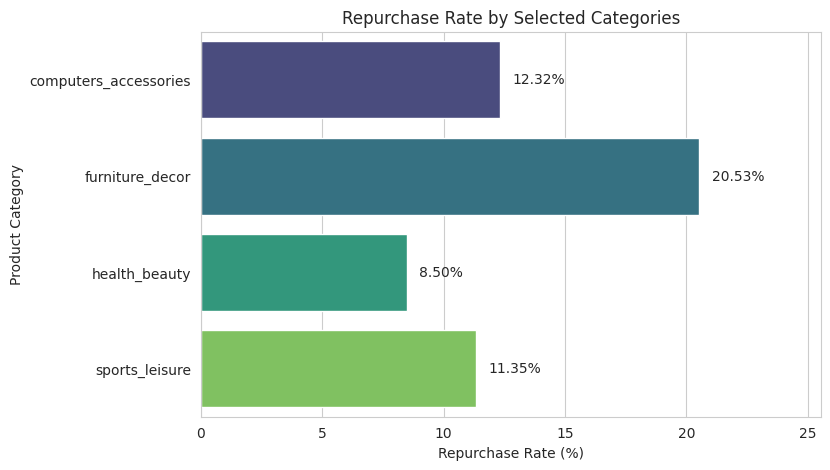

In [ ]:
# Seaborn을 활용한 시각화
import seaborn as sns
import matplotlib.pyplot as plt

# Seaborn 스타일 설정
sns.set_style("whitegrid")

# 그래프 그리기
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=filtered_repurchase_rate.values, y=filtered_repurchase_rate.index, palette="viridis")

# 레이블 추가
plt.xlabel("Repurchase Rate (%)")
plt.ylabel("Product Category")
plt.title("Repurchase Rate by Selected Categories")

# 수치 정확하게 표시
for index, value in enumerate(filtered_repurchase_rate):
    ax.text(value + 0.5, index, f"{value:.2f}%", va='center', fontsize=10)

plt.xlim(0, max(filtered_repurchase_rate) + 5)
plt.show()


→ 가장 재구매율이 높은 것은 **furniture_decor**로 확인.

## 통계적 검증
고객이 동일 카테고리를 반복 구매할 확률이 무작위보다 높은지 검정하고자 함.

### 카이제곱검정
→ 고객의 재구매 여부는 범주형 데이터이므로 두 변수가 서로 독립적인지 확인
- **변수 1:** 고객이 특정 카테고리를 재구매했는가? (Yes / No)
- **변수 2:** 제품 카테고리


- **귀무가설 (H₀):** 고객이 과거에 구매한 카테고리를 다시 구매하는 것은 **랜덤**이다.
    
    → 고객이 이전에 구매한 카테고리와 관계없이 아무 카테고리나 다시 구매할 가능성이 동일하다.
    
- **대립가설 (H₁):** 고객은 과거에 구매한 카테고리를 다시 구매할 가능성이 **유의미하다.**
    
    → 특정 카테고리를 한 번 구매한 고객은 다시 같은 카테고리를 구매하는 경향이 있다.
        
따라서 p-value가 0.05보다 작다면 "고객이 과거에 구매한 카테고리를 다시 구매하는 경향이 있다"고 판단할 수 있다.

In [ ]:
from scipy.stats import chi2_contingency

# 재구매 여부를 나타내는 컬럼 추가
df['repeat_purchase'] = df.duplicated(subset=['customer_unique_id', 'product_category_name'], keep=False)

# 교차표 생성
contingency_table = pd.crosstab(df['repeat_purchase'], df['product_category_name'])

# 카이제곱 검정 실행
chi2, p, dof, expected = chi2_contingency(contingency_table)

# 결과 출력
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")

# 유의 수준 0.05 기준 검정 결과 해석
if p < 0.05:
    print("과거에 구매한 적 있는 카테고리에서 재구매할 가능성이 유의미하게 높음.")
else:
    print("우연적 결과.")


Chi-square statistic: 5183.011154437786
P-value: 0.0
과거에 구매한 적 있는 카테고리에서 재구매할 가능성이 유의미하게 높음.


# **STEP03**

전환율 구하기

In [ ]:
df_new=pd.read_csv('/content/gdrive/MyDrive/MainQuest04/step02.csv')

In [ ]:
customer_category_counts = df_new.groupby(['customer_unique_id', 'product_category_name']).size().reset_index(name='purchase_count')

#여러 개의 카테고리를 구매한 고객만 필터링
multi_category_customers = customer_category_counts[customer_category_counts.duplicated(subset=['customer_unique_id'], keep=False)]

#각 고객이 구매한 모든 카테고리 조합을 생성
customer_category_pairs = multi_category_customers.groupby('customer_unique_id')['product_category_name'].apply(set).reset_index()

#모든 조합을 추출하여 빈도수 계산
from itertools import combinations
from collections import Counter

category_combinations = Counter()

for categories in customer_category_pairs['product_category_name']:
    for combo in combinations(categories, 2):
        category_combinations[frozenset(combo)] += 1

#데이터프레임으로 변환
category_combinations_df = pd.DataFrame(category_combinations.items(), columns=['Category Pair', 'Count'])
category_combinations_df = category_combinations_df.sort_values(by='Count', ascending=False)

#'bed_bath_table'과 함께 구매된 카테고리 필터링
bed_bath_related_combinations = category_combinations_df[category_combinations_df['Category Pair'].apply(lambda x: 'bed_bath_table' in x)].copy()

#'bed_bath_table'과 함께 구매된 카테고리를 추출
bed_bath_related_combinations['Other Category'] = bed_bath_related_combinations['Category Pair'].apply(lambda x: list(x - {'bed_bath_table'})[0])

#'bed_bath_table'의 총 구매 횟수 계산
bed_bath_total_sales = df_new[df_new['product_category_name'] == 'bed_bath_table'].shape[0]

#전환율(%) 계산
bed_bath_related_combinations['Conversion Rate (%)'] = (bed_bath_related_combinations['Count'] / bed_bath_total_sales) * 100

#가장 높은 전환율을 가진 카테고리 찾기
top_conversion_category = bed_bath_related_combinations.sort_values(by='Count', ascending=False).iloc[0]

#최종 결과 출력
top_conversion_category
bed_bath_related_combinations.head() # 여기서 말하는 전환률은 함께 구입한 경우의 수를 의미한다.

,Category Pair,Count,Other Category,Conversion Rate (%)
24,"(bed_bath_table, furniture_decor)",156,furniture_decor,1.403509
10,"(bed_bath_table, housewares)",67,housewares,0.602789
33,"(bed_bath_table, home_confort)",54,home_confort,0.485830
45,"(baby, bed_bath_table)",37,baby,0.332883
23,"(bed_bath_table, health_beauty)",29,health_beauty,0.260909


In [ ]:

# 1. 구매 이력 정리 (고객별 구매 순서 정렬)
if 'order_purchase_timestamp' in df_new.columns:
    df_new['order_purchase_timestamp'] = pd.to_datetime(df_new['order_purchase_timestamp'])
    df_sorted = df_new.sort_values(by=['customer_unique_id', 'order_purchase_timestamp'])
else:
    # 구매 날짜 정보가 없는 경우, order_id 기준 정렬
    df_sorted = df_new.sort_values(by=['customer_unique_id', 'order_id'])

# 2. 고객별 첫 번째 구매 카테고리 확인
df_sorted['previous_category'] = df_sorted.groupby('customer_unique_id')['product_category_name'].shift(1)

# 3. 'bed_bath_table' 구매 이후 다른 카테고리를 구매한 경우 필터링
df_transitions = df_sorted[(df_sorted['previous_category'] == 'bed_bath_table') &
                           (df_sorted['product_category_name'] != 'bed_bath_table')]

# 4. bed_bath_table 이후 가장 많이 구매된 카테고리 및 전환율 계산
transition_counts = df_transitions['product_category_name'].value_counts()
total_bed_bath_customers = df_sorted[df_sorted['product_category_name'] == 'bed_bath_table']['customer_unique_id'].nunique()

# 5. 전환율(%) 계산
transition_rates = (transition_counts / total_bed_bath_customers) * 100
transition_rates_df = transition_rates.reset_index()
transition_rates_df.columns = ['Next Category', 'Transition Rate (%)']

# 결과 출력
transition_rates_df

,Next Category,Transition Rate (%)
0,furniture_decor,0.940405
1,housewares,0.349918
2,home_confort,0.306178
3,health_beauty,0.185894
4,baby,0.164024
5,cool_stuff,0.131219
6,computers_accessories,0.109349
7,garden_tools,0.087479
8,sports_leisure,0.087479
9,pet_shop,0.087479


# **STEP04**

**고객이 가장 많이 이동하는 카테고리 구하기**

STEP 3과 다르게 장기적인 관점에서 본 전환건수

bed_bath_table을 구매 후 기간을 두지 않고 다른 카테고리를 구매한 건수를 의미함

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Brazilian E-Commerce Public Dataset/Step02.csv')

#원본 백업
df_step02 = df.copy()

In [ ]:
# 특정 카테고리(bed_bath_table) 구매 고객 리스트
bbt_customers = df[df["product_category_name"] == "bed_bath_table"]["customer_unique_id"].unique()

# 해당 고객들의 전체 구매 내역 가져오기
bbt_followup_purchases = df[df["customer_unique_id"].isin(bbt_customers)]

# 'bed_bath_table'이 아닌 다른 카테고리의 구매 건수 집계
bbt_conversion_counts = (
    bbt_followup_purchases[bbt_followup_purchases["product_category_name"] != "bed_bath_table"]
    ["product_category_name_english"].value_counts()
)

# 상위 10개 카테고리 출력
bbt_conversion_counts.head(5)

,count
product_category_name_english,
furniture_decor,218
housewares,91
home_confort,58
baby,39
health_beauty,34


<ipython-input-12-7b1a7182c933>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=bbt_conversion_counts.head(5).values, y=bbt_conversion_counts.head(5).index, palette="coolwarm")


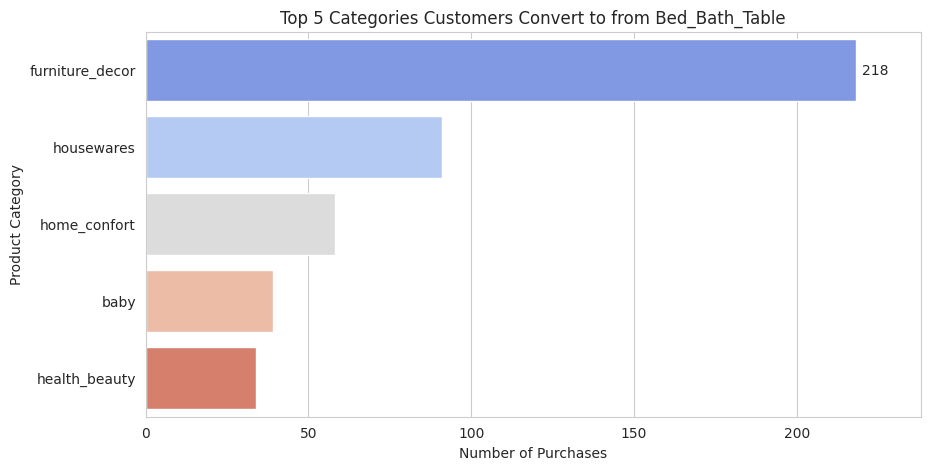

In [ ]:
# 시각화를 위한 라이브러리 불러오기
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn 스타일 설정
sns.set_style("whitegrid")

# 그래프 그리기
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=bbt_conversion_counts.head(5).values, y=bbt_conversion_counts.head(5).index, palette="coolwarm")

# 레이블 추가
plt.xlabel("Number of Purchases")
plt.ylabel("Product Category")
plt.title("Top 5 Categories Customers Convert to from Bed_Bath_Table")

# 수치 정확하게 표시
for index, value in enumerate(bbt_conversion_counts.head(5).values):
    ax.text(value + 2, index, f"{value}", va='center', fontsize=12)

plt.xlim(0, max(bbt_conversion_counts.head(10)) + 20)
plt.show()


### 카이제곱검증 수행
특정 카테고리가 단순히 인기 있는 것인지, Bed_Bath_Table 구매자에게 특별한 연관성이 있는지 알기 위함

In [ ]:
from scipy.stats import chi2_contingency

# Bed_Bath_Table 구매자 중 Furniture_Decor 추가 구매 고객 수
bbt_furniture_count = bbt_followup_purchases[bbt_followup_purchases["product_category_name"] == "furniture_decor"]["customer_unique_id"].nunique()

# 비구매자 중 Furniture_Decor 구매 고객 수
non_bbt_furniture_count = df[
    (df["product_category_name"] == "furniture_decor") &
    (~df["customer_unique_id"].isin(bbt_customers))
]["customer_unique_id"].nunique()

# 전체 Bed_Bath_Table 구매 고객 수
bbt_total = len(bbt_customers)

# 전체 고객 수 중 Bed_Bath_Table 미구매자 수
non_bbt_total = len(df["customer_unique_id"].unique()) - bbt_total

# 교차표 구성
contingency_table = [
    [bbt_furniture_count, bbt_total - bbt_furniture_count],  # Bed_Bath_Table 구매자
    [non_bbt_furniture_count, non_bbt_total - non_bbt_furniture_count]  # 비구매자
]

# 카이제곱 검정 수행
chi2, p, dof, expected = chi2_contingency(contingency_table)

# 결과 출력
print(f"카이제곱 통계량: {chi2:.4f}, p-value: {p:.10f}")

if p < 0.05:
    print("→ Bed_Bath_Table 구매자와 Furniture_Decor 구매 간 유의미한 관계가 있음.")
else:
    print("→ Bed_Bath_Table 구매자와 Furniture_Decor 구매 간 유의미한 관계가 없음.")


카이제곱 통계량: 389.0684, p-value: 0.0000000000
→ Bed_Bath_Table 구매자와 Furniture_Decor 구매 간 유의미한 관계가 있음.


### 전환이 유의미한지 확인하기 위해 전환율 확인

In [ ]:
# Bed_Bath_Table을 구매한 전체 고객 수
bbt_total_customers = len(bbt_customers)

# 각 카테고리별 전환율 계산 (Bed_Bath_Table 구매자 중 특정 카테고리도 구매한 고객 비율)
bbt_conversion_rates = (
    bbt_followup_purchases[bbt_followup_purchases["product_category_name"] != "bed_bath_table"]
    .groupby("product_category_name")["customer_unique_id"].nunique() / bbt_total_customers
) * 100

# 전환율 상위 5개 카테고리 확인
bbt_conversion_rates = bbt_conversion_rates.sort_values(ascending=False)

# 결과 출력
bbt_conversion_rates.head(5)


,customer_unique_id
product_category_name,
furniture_decor,1.705850
housewares,0.732641
home_confort,0.590487
baby,0.404593
health_beauty,0.317113


Bed_Bath_Table 고객이 가장 많이 이동하는 카테고리가 furniture_decor인 것은 맞지만, 1.7%에 불과해 전환율을 높일 방안 강구가 남은 숙제.